# Clustering

1.) K- Means

2.) Heirarchical

3.) DBSCAN

# 1.) K-Means Clustering Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs

In [2]:
# Create a clustering dataset

x, y = make_blobs(n_samples = 1000, centers = 4, n_features = 2, random_state = 42)

In [3]:
x

array([[-8.55503989,  7.06461794],
       [-6.13753182, -6.58081701],
       [-6.32130028, -6.8041042 ],
       ...,
       [ 3.69047995,  4.60555175],
       [-7.48913939, -7.0670809 ],
       [-9.40049578,  7.11430104]])

In [4]:
y

array([3, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 3, 0, 2, 2, 2, 0, 0, 0, 1, 1, 3,
       3, 3, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 0, 3, 2, 1, 3, 3, 1, 2, 1, 3,
       1, 3, 0, 1, 3, 1, 2, 0, 1, 3, 0, 3, 0, 0, 0, 2, 2, 0, 2, 3, 1, 0,
       2, 2, 1, 0, 3, 0, 1, 2, 1, 3, 1, 0, 1, 0, 2, 0, 0, 0, 1, 3, 2, 2,
       0, 0, 0, 0, 1, 1, 3, 1, 3, 0, 1, 2, 1, 3, 3, 0, 3, 1, 1, 0, 2, 0,
       3, 2, 1, 1, 1, 1, 2, 3, 2, 1, 0, 2, 3, 1, 3, 2, 1, 3, 2, 1, 0, 2,
       1, 3, 1, 3, 0, 2, 1, 1, 0, 0, 3, 3, 3, 1, 1, 0, 0, 0, 0, 3, 2, 2,
       0, 1, 0, 1, 1, 3, 2, 0, 1, 2, 0, 0, 1, 2, 3, 2, 1, 0, 0, 1, 0, 3,
       2, 3, 2, 3, 1, 1, 0, 2, 0, 2, 1, 3, 0, 2, 1, 0, 1, 1, 0, 3, 2, 2,
       2, 3, 0, 2, 1, 0, 1, 1, 2, 0, 1, 2, 2, 3, 2, 2, 1, 0, 2, 0, 3, 1,
       3, 3, 2, 0, 3, 0, 1, 2, 2, 0, 0, 2, 0, 3, 2, 2, 3, 2, 2, 1, 2, 3,
       2, 1, 3, 0, 1, 0, 1, 1, 1, 1, 3, 1, 1, 2, 0, 2, 2, 1, 1, 1, 3, 1,
       3, 3, 2, 1, 0, 3, 1, 0, 1, 2, 0, 3, 1, 3, 2, 1, 3, 2, 3, 1, 2, 0,
       0, 2, 0, 3, 3, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2,

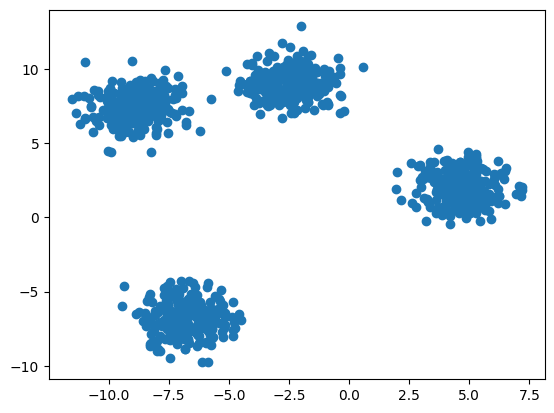

In [5]:
# Plotting x1 vs x2 graph for whole dataset.

plt.scatter(x[:,0], x[:,1])

In [6]:
# Train-test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.33, random_state = 42)

# Implementing K-Means

1.) Manual method (Elbow method)

2.) Automated method (using Knee Limiter)

In [7]:
from sklearn.cluster import KMeans

### First calculate WCSS to determine the K value.

In [8]:
# NOTE: It will be used in both methods.

wcss = []

for k in range(1,15):
  kmeans = KMeans(n_clusters = k, init = 'k-means++')
  kmeans.fit(x_train)
  wcss.append(kmeans.inertia_)


In [9]:
wcss

[44722.49505528866,
 22363.190337259784,
 4943.155367712685,
 1324.0492692139335,
 1195.3730886284848,
 1091.8588125900287,
 1011.7826578685457,
 902.2046787240758,
 801.7306556999455,
 762.4356286243777,
 684.6297494400816,
 669.2447735175308,
 562.8161322604853,
 562.2047603454207]

## 1.) Manual(Elbow) method

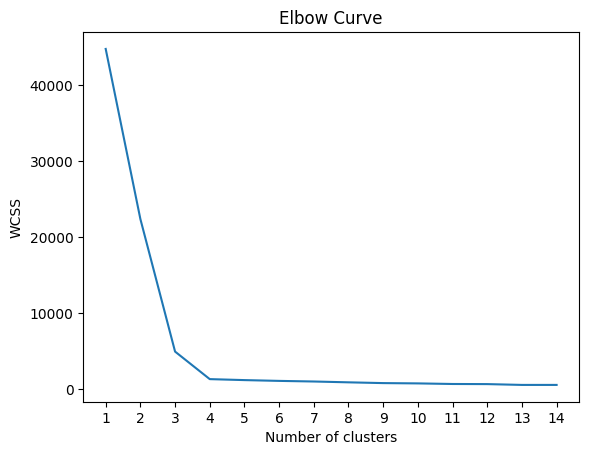

In [10]:
# Plotting elbow curve

plt.plot(range(1,15), wcss)

plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1,15))     # It provides the x values, all numbers

plt.title('Elbow Curve')
plt.show()


**Analysis:** We can see that the number if clusters is 4 here.

In [11]:
# Creating 4 clusters and determining the y values.

kmeans = KMeans(n_clusters = 4, init ="k-means++")

In [12]:
y_train_labels = kmeans.fit_predict(x_train)

In [13]:
y_train_labels

array([0, 3, 0, 2, 3, 2, 2, 2, 2, 1, 1, 2, 1, 0, 3, 1, 1, 1, 1, 1, 2, 1,
       3, 1, 1, 0, 0, 1, 1, 3, 1, 3, 3, 3, 1, 0, 1, 2, 0, 0, 0, 3, 1, 2,
       2, 1, 2, 0, 1, 3, 0, 2, 3, 0, 3, 1, 3, 2, 2, 0, 0, 0, 0, 0, 0, 1,
       3, 3, 0, 2, 2, 0, 3, 2, 1, 1, 2, 3, 1, 2, 3, 3, 0, 3, 3, 3, 2, 1,
       1, 2, 1, 3, 0, 2, 1, 3, 1, 1, 3, 2, 1, 2, 1, 0, 0, 1, 1, 3, 3, 0,
       1, 0, 1, 3, 2, 3, 1, 0, 0, 1, 2, 2, 1, 0, 2, 2, 2, 1, 2, 3, 2, 2,
       1, 0, 0, 3, 2, 1, 2, 0, 3, 2, 0, 1, 3, 2, 3, 3, 3, 1, 3, 3, 3, 0,
       3, 3, 2, 1, 0, 0, 0, 0, 3, 2, 0, 0, 1, 0, 3, 3, 2, 3, 3, 2, 0, 2,
       2, 2, 2, 1, 0, 2, 1, 0, 3, 0, 0, 3, 0, 3, 0, 1, 3, 3, 1, 1, 3, 1,
       0, 2, 1, 2, 1, 0, 2, 3, 0, 3, 2, 2, 1, 1, 3, 0, 3, 0, 0, 2, 3, 2,
       0, 3, 2, 1, 0, 0, 0, 1, 1, 1, 3, 3, 2, 0, 2, 2, 3, 1, 0, 3, 1, 3,
       0, 0, 2, 1, 3, 3, 2, 0, 0, 2, 2, 3, 1, 1, 2, 0, 3, 3, 1, 3, 1, 0,
       0, 1, 0, 2, 3, 0, 1, 3, 0, 0, 1, 0, 2, 2, 3, 0, 2, 3, 0, 1, 3, 2,
       3, 1, 3, 3, 3, 2, 3, 1, 1, 0, 3, 0, 3, 2, 1,

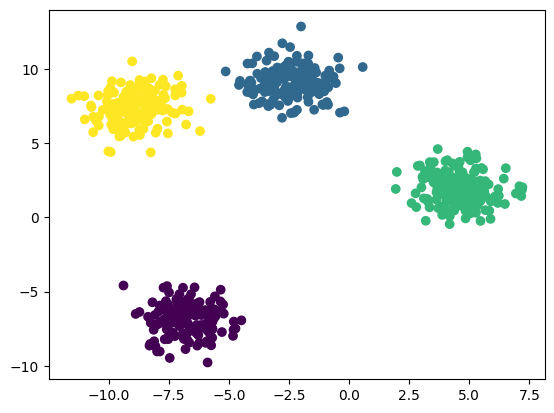

In [14]:
# Plotting x1 vs x2 graph for training data

plt.scatter(x_train[:,0], x_train[:,1], c = y_train_labels)

## To find labels for test data

NOTE: 'fit_predict' is for train data whereas we use only 'predict' for test data.

In [15]:
y_test_labels = kmeans.predict(x_test)

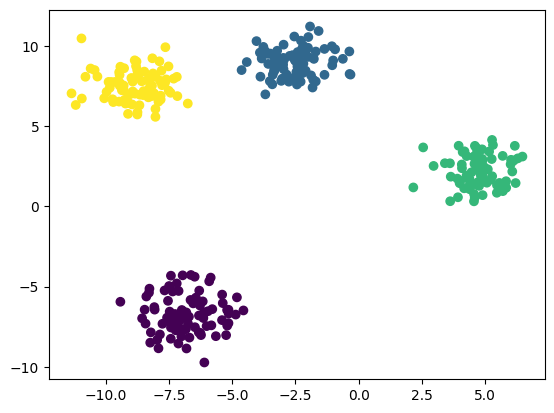

In [16]:
# Plotting x1 vs x2 graph for test data

plt.scatter(x_test[:,0], x_test[:,1], c = y_test_labels)

## 2.) Automated method (Knee Locator)

In [17]:
# kneed is present outside of sklearn, so we need to install it.

!pip install kneed

In [18]:
from kneed import KneeLocator

In [19]:
kl = KneeLocator(range(1,15), wcss, curve = 'convex', direction = 'decreasing')
kl.elbow

4

# Performance metrics

## Silhoutte Scoring

In [20]:
from sklearn.metrics import silhouette_score

In [21]:
kmeans.labels_

array([0, 3, 0, 2, 3, 2, 2, 2, 2, 1, 1, 2, 1, 0, 3, 1, 1, 1, 1, 1, 2, 1,
       3, 1, 1, 0, 0, 1, 1, 3, 1, 3, 3, 3, 1, 0, 1, 2, 0, 0, 0, 3, 1, 2,
       2, 1, 2, 0, 1, 3, 0, 2, 3, 0, 3, 1, 3, 2, 2, 0, 0, 0, 0, 0, 0, 1,
       3, 3, 0, 2, 2, 0, 3, 2, 1, 1, 2, 3, 1, 2, 3, 3, 0, 3, 3, 3, 2, 1,
       1, 2, 1, 3, 0, 2, 1, 3, 1, 1, 3, 2, 1, 2, 1, 0, 0, 1, 1, 3, 3, 0,
       1, 0, 1, 3, 2, 3, 1, 0, 0, 1, 2, 2, 1, 0, 2, 2, 2, 1, 2, 3, 2, 2,
       1, 0, 0, 3, 2, 1, 2, 0, 3, 2, 0, 1, 3, 2, 3, 3, 3, 1, 3, 3, 3, 0,
       3, 3, 2, 1, 0, 0, 0, 0, 3, 2, 0, 0, 1, 0, 3, 3, 2, 3, 3, 2, 0, 2,
       2, 2, 2, 1, 0, 2, 1, 0, 3, 0, 0, 3, 0, 3, 0, 1, 3, 3, 1, 1, 3, 1,
       0, 2, 1, 2, 1, 0, 2, 3, 0, 3, 2, 2, 1, 1, 3, 0, 3, 0, 0, 2, 3, 2,
       0, 3, 2, 1, 0, 0, 0, 1, 1, 1, 3, 3, 2, 0, 2, 2, 3, 1, 0, 3, 1, 3,
       0, 0, 2, 1, 3, 3, 2, 0, 0, 2, 2, 3, 1, 1, 2, 0, 3, 3, 1, 3, 1, 0,
       0, 1, 0, 2, 3, 0, 1, 3, 0, 0, 1, 0, 2, 2, 3, 0, 2, 3, 0, 1, 3, 2,
       3, 1, 3, 3, 3, 2, 3, 1, 1, 0, 3, 0, 3, 2, 1,

In [22]:
silt_coeff = []

for i in range(2,15):
  kmeans = KMeans(n_clusters = k, init = 'k-means++')
  kmeans.fit(x_train)
  score = silhouette_score(x_train, kmeans.labels_)
  silt_coeff.append(score)


In [23]:
silt_coeff

[0.3240845041234925,
 0.31359595464767215,
 0.34337290982171315,
 0.3138238298776078,
 0.32864583484415977,
 0.33330481838883513,
 0.3161361176184655,
 0.3162347130065843,
 0.32965194795789,
 0.32425799666524774,
 0.3254550724474646,
 0.32401390879034225,
 0.33240192738663893]

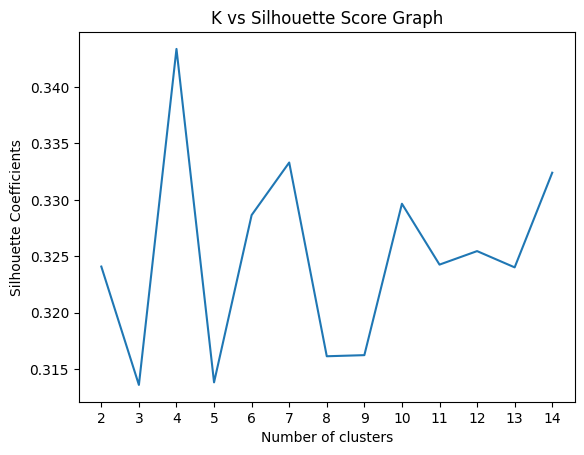

In [24]:
# Plotting k vs Silhoutte score values graph

plt.plot(range(2,15), silt_coeff)

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficients')
plt.xticks(range(2,15))     # It provides the x values, all numbers

plt.title('K vs Silhouette Score Graph')
plt.show()


# Note:

If I give range(1,15), then K = 3 (wrong) but when I changed it to range(2,15), then K = 4 (right).